# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
### Your code here
df_SeoulBikeData = pd.read_csv('SeoulBikeData.csv')
df_SeoulBikeData

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday,Yes


In [3]:
# Gaining insight from the data
print(df_SeoulBikeData.head())

         Date  Rented Bike Count  Hour  Temperature (C)  Humidity (%)  \
0  01/12/2017                254     0             -5.2          37.0   
1  01/12/2017                204     1             -5.5          38.0   
2  01/12/2017                173     2             -6.0          39.0   
3  01/12/2017                107     3             -6.2          40.0   
4  01/12/2017                 78     4             -6.0          36.0   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

  Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm) Seasons     Holiday  \
0                       0            0             0  Winter  No Holiday   


In [4]:
print(df_SeoulBikeData.tail())

            Date  Rented Bike Count  Hour  Temperature (C)  Humidity (%)  \
8755  30/11/2018               1003    19              4.2          34.0   
8756  30/11/2018                764    20              3.4          37.0   
8757  30/11/2018                694    21              2.6          39.0   
8758  30/11/2018                712    22              2.1          41.0   
8759  30/11/2018                584    23              1.9          43.0   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

     Solar Radiation (MJ/m2) Rainfall(mm) Snowfall (cm) Seasons     Holiday  \
8755                       0         

In [5]:
# Summarising it in text using one pandas function
print(df_SeoulBikeData.describe())

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8760.000000  8760.000000      8760.000000   8760.000000   
mean          714.876027    11.500000        12.945765     58.268014   
std          1160.468927     6.922582        12.376168     20.807845   
min             0.000000     0.000000       -17.800000     -2.200000   
25%           191.000000     5.750000         3.500000     42.000000   
50%           504.500000    11.500000        13.700000     57.000000   
75%          1066.000000    17.250000        22.500000     74.000000   
max         90997.000000    23.000000       195.000000    455.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  
count       8760.000000       8760.000000                8760.000000  
mean           1.848950       1436.825799                   4.073813  
std           10.665215        608.298712                  13.060369  
min           -0.700000         27.000000                 -30.60000

In [6]:
print(df_SeoulBikeData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df_SeoulBikeData['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

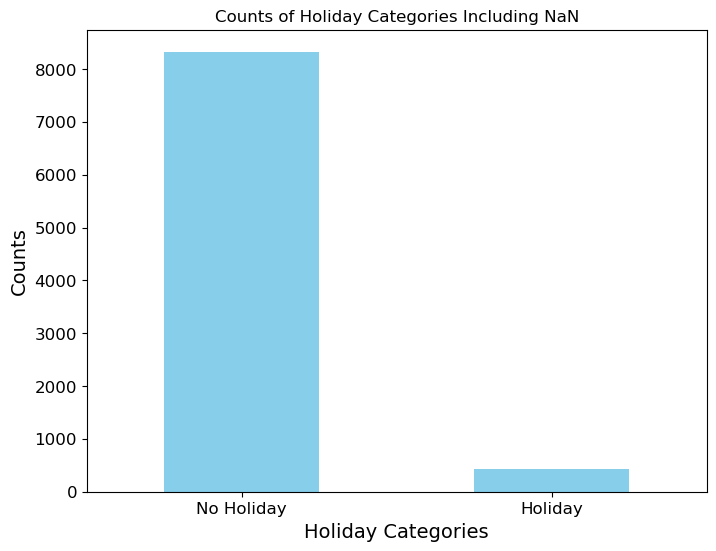

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_SeoulBikeData is already loaded with your actual data

# Convert specific non-numeric columns to numeric
non_numeric_columns = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in non_numeric_columns:
    df_SeoulBikeData[col] = pd.to_numeric(df_SeoulBikeData[col], errors='coerce')

# Count the occurrences of each value including NaN in the 'Holiday' column
holiday_counts = df_SeoulBikeData['Holiday'].value_counts(dropna=False)

# Plot the results
plt.figure(figsize=(8, 6))
holiday_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Holiday Categories Including NaN')
plt.xlabel('Holiday Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()


The majority of the days in the dataset are non-holidays, with a considerably smaller percentage of holidays and some missing values, as can be plainly seen by graphing the distribution of holidays. This visualization aids in comprehending the structure of the dataset and gets ready for additional research or modeling.

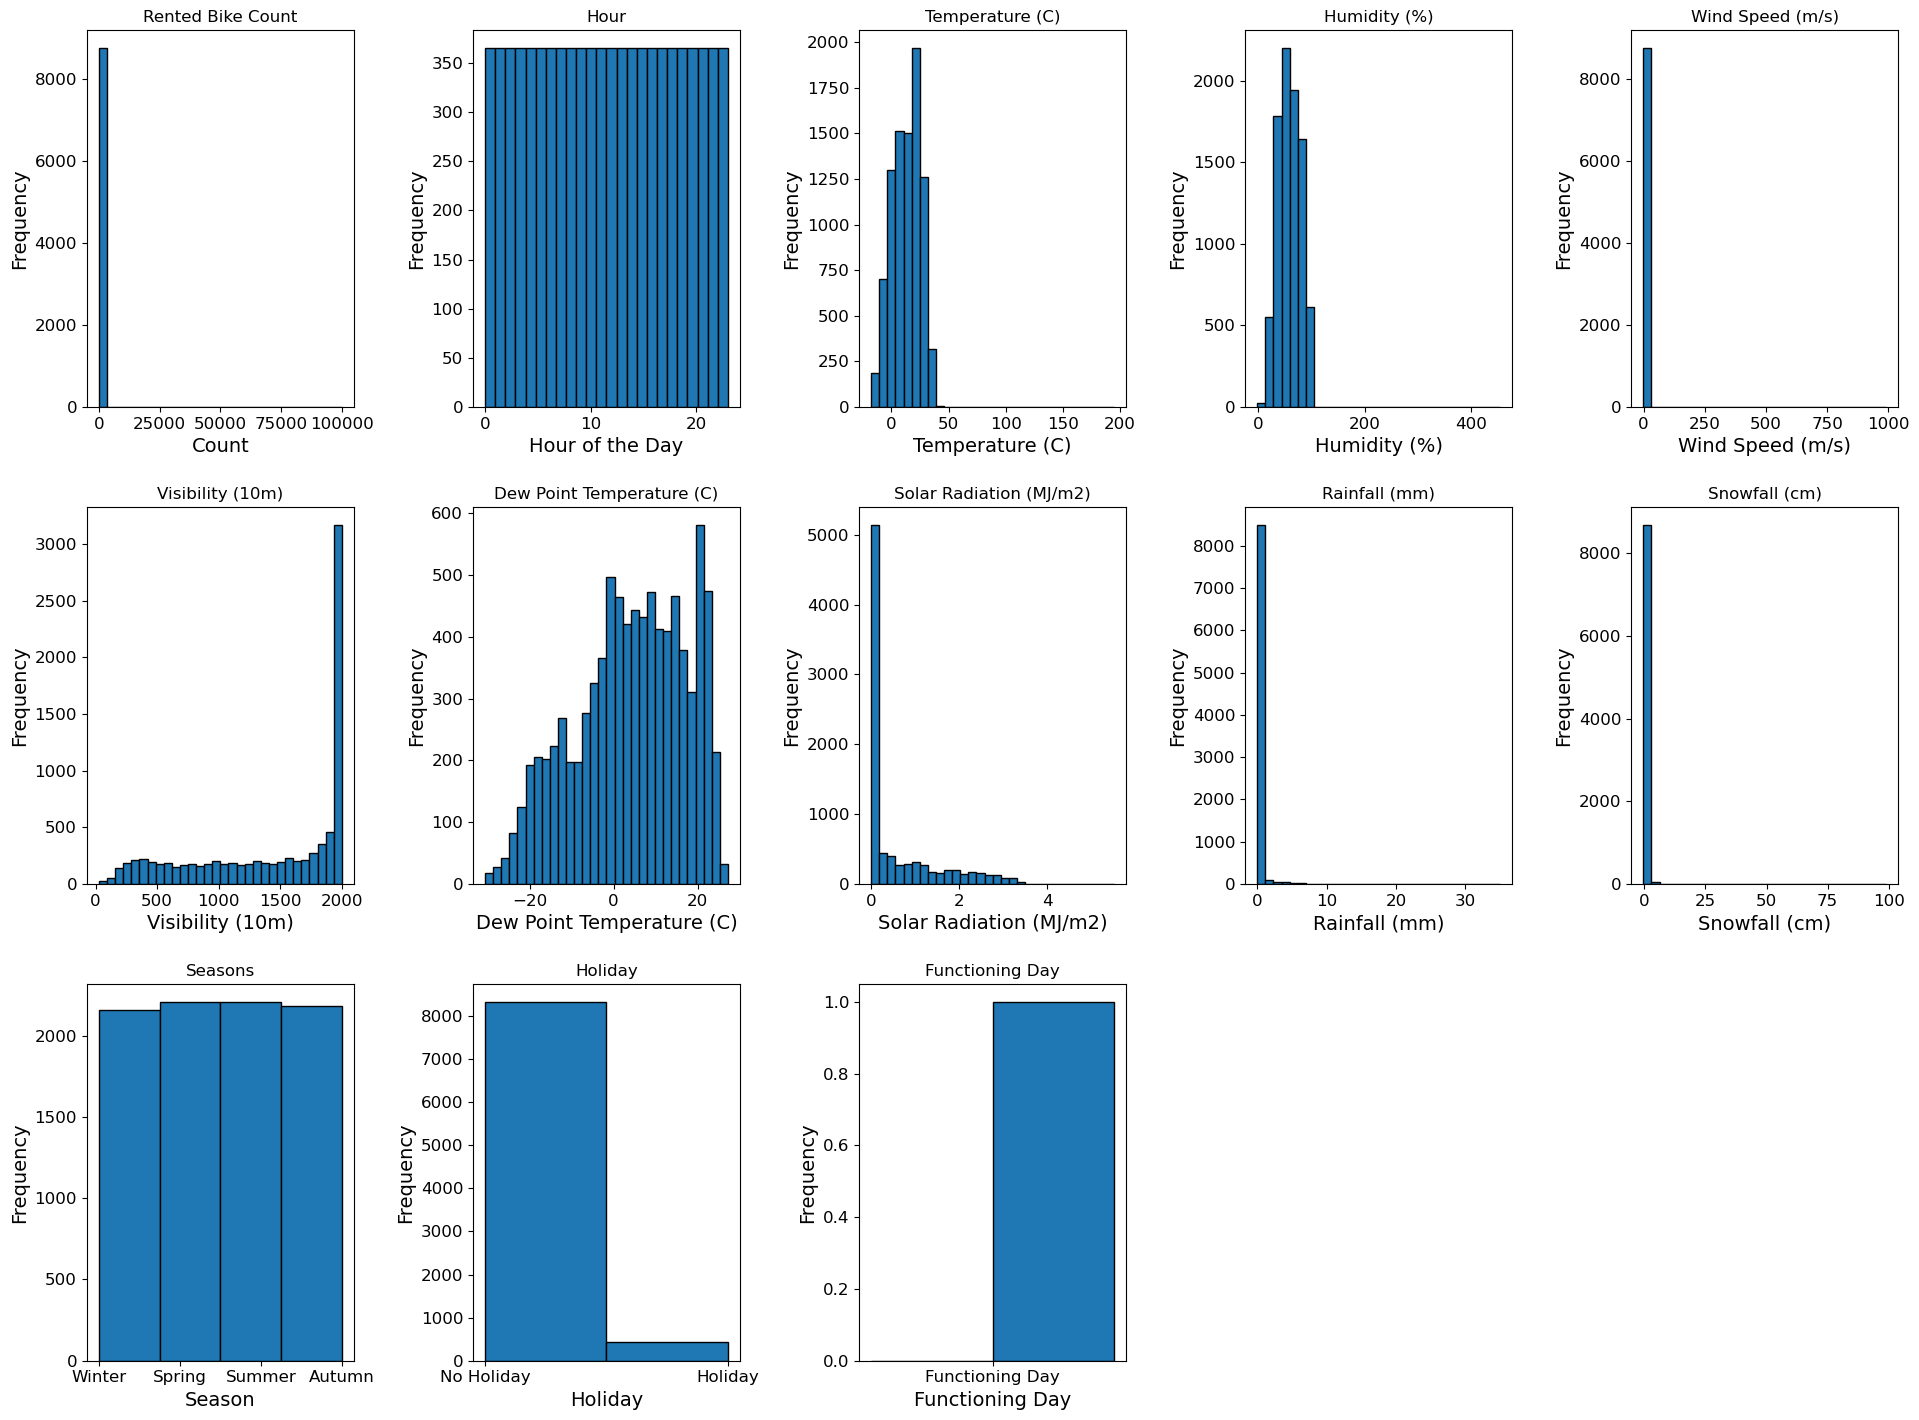

In [9]:
# Setting up the figure
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Rented Bike Count (Adjusted x-axis range)
axes[0, 0].hist(df_SeoulBikeData['Rented Bike Count'], bins=30, range=(0, 100000), edgecolor='k')
axes[0, 0].set_title('Rented Bike Count')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Frequency')

# Hour
axes[0, 1].hist(df_SeoulBikeData['Hour'], bins=24, edgecolor='k')
axes[0, 1].set_title('Hour')
axes[0, 1].set_xlabel('Hour of the Day')
axes[0, 1].set_ylabel('Frequency')

# Temperature
axes[0, 2].hist(df_SeoulBikeData['Temperature (C)'], bins=30, edgecolor='k')
axes[0, 2].set_title('Temperature (C)')
axes[0, 2].set_xlabel('Temperature (C)')
axes[0, 2].set_ylabel('Frequency')

# Humidity
axes[0, 3].hist(df_SeoulBikeData['Humidity (%)'], bins=30, edgecolor='k')
axes[0, 3].set_title('Humidity (%)')
axes[0, 3].set_xlabel('Humidity (%)')
axes[0, 3].set_ylabel('Frequency')

# Wind Speed
axes[0, 4].hist(df_SeoulBikeData['Wind speed (m/s)'], bins=30, edgecolor='k')
axes[0, 4].set_title('Wind Speed (m/s)')
axes[0, 4].set_xlabel('Wind Speed (m/s)')
axes[0, 4].set_ylabel('Frequency')

# Visibility
axes[1, 0].hist(df_SeoulBikeData['Visibility (10m)'], bins=30, edgecolor='k')
axes[1, 0].set_title('Visibility (10m)')
axes[1, 0].set_xlabel('Visibility (10m)')
axes[1, 0].set_ylabel('Frequency')

# Dew Point Temperature
axes[1, 1].hist(df_SeoulBikeData['Dew point temperature (C)'], bins=30, edgecolor='k')
axes[1, 1].set_title('Dew Point Temperature (C)')
axes[1, 1].set_xlabel('Dew Point Temperature (C)')
axes[1, 1].set_ylabel('Frequency')

# Solar Radiation
axes[1, 2].hist(df_SeoulBikeData['Solar Radiation (MJ/m2)'], bins=30, edgecolor='k')
axes[1, 2].set_title('Solar Radiation (MJ/m2)')
axes[1, 2].set_xlabel('Solar Radiation (MJ/m2)')
axes[1, 2].set_ylabel('Frequency')

# Rainfall
axes[1, 3].hist(df_SeoulBikeData['Rainfall(mm)'], bins=30, edgecolor='k')
axes[1, 3].set_title('Rainfall (mm)')
axes[1, 3].set_xlabel('Rainfall (mm)')
axes[1, 3].set_ylabel('Frequency')

# Snowfall
axes[1, 4].hist(df_SeoulBikeData['Snowfall (cm)'], bins=30, edgecolor='k')
axes[1, 4].set_title('Snowfall (cm)')
axes[1, 4].set_xlabel('Snowfall (cm)')
axes[1, 4].set_ylabel('Frequency')

# Seasons
axes[2, 0].hist(df_SeoulBikeData['Seasons'], bins=4, edgecolor='k')
axes[2, 0].set_title('Seasons')
axes[2, 0].set_xlabel('Season')
axes[2, 0].set_ylabel('Frequency')

# Holiday
axes[2, 1].hist(df_SeoulBikeData['Holiday'], bins=2, edgecolor='k')
axes[2, 1].set_title('Holiday')
axes[2, 1].set_xlabel('Holiday')
axes[2, 1].set_ylabel('Frequency')

# Functioning Day
axes[2, 2].hist(['Functioning Day'], bins=2, edgecolor='k')
axes[2, 2].set_title('Functioning Day')
axes[2, 2].set_xlabel('Functioning Day')
axes[2, 2].set_ylabel('Frequency')

# Hide unused subplots
axes[2, 3].axis('off')
axes[2, 4].axis('off')

plt.show()


### Histogram for Hour
plt.figure(figsize=(10, 6))
sns.histplot(data=mdf, x="Hour", bins=24)
plt.title("Distribution of Hours")
plt.show()

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [10]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [11]:
# 1. Using the "Functioning day" feature, remove rows from the DataFrame where the business is closed 
# and then delete the Functioning Day feature from the DataFrame.
cleaned_df = df_SeoulBikeData[df_SeoulBikeData['Functioning Day'] == 'Yes'] 
cleaned_df = cleaned_df.drop(['Functioning Day'], axis=1)
cleaned_df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [12]:
# 2. Using pandas get_dummy()
cleaned_df = pd.get_dummies(cleaned_df, columns = ['Seasons'])
cleaned_df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,0,0,0,1
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,0,0,0,1
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,0,0,0,1
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,0,0,0,1
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,1,0,0,0
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,1,0,0,0
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,1,0,0,0
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,1,0,0,0


In [13]:
# 3. Replace the Date feature with a binary Weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
cleaned_df['Date'] = cleaned_df['Date'].apply(date_is_weekday)
cleaned_df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,0,0,0,1
1,1,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,0,0,0,1
2,1,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,0,0,0,1
3,1,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,0,0,0,1
4,1,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,1,0,0,0
8756,1,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,1,0,0,0
8757,1,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,1,0,0,0
8758,1,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,1,0,0,0


In [14]:
cleaned_df['Solar Radiation (MJ/m2)'].unique()

array([0.  , 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01, 0.54, 0.24, 0.08,
       0.3 , 0.8 , 1.  , 1.09, 1.12, 0.99, 0.74, 0.22, 0.06, 0.02, 0.25,
       0.43, 0.6 , 0.69, 0.53, 0.2 , 0.05, 0.64, 1.17, 0.88, 0.55, 0.18,
       0.21, 0.63, 0.93, 1.08, 1.1 , 0.96, 0.72, 0.36, 0.1 , 0.14, 0.41,
       0.98, 1.14, 1.04, 0.84, 0.51, 0.15, 1.22, 0.87, 0.56, 0.61, 0.89,
       1.05, 1.13, 1.06, 0.4 , 0.03, 0.28, 0.35, 0.62, 1.26, 1.24, 0.92,
       0.58, 0.19, 1.23, 0.13, 0.52, 0.48, 0.09, 0.34, 0.42, 0.32, 0.86,
       1.07, 0.17, 0.85, 0.47, 0.57, 0.91, 0.71, 0.12, 0.67, 0.77, 0.78,
       0.16, 0.66, 0.38, 0.11, 0.04, 0.07, 1.18, 0.9 , 0.33, 0.75, 0.59,
       0.29, 0.81, 0.83, 0.39, 1.15, 1.03, 0.95, 0.76, 1.02, 0.26, 0.5 ,
       0.27, 0.73, 0.46, 0.31, 1.2 , 1.19, 0.45, 0.49, 0.79, 0.44, 0.68,
       1.27, 1.25, 1.21, 0.7 , 1.28, 1.3 , 1.29, 0.82, 1.65, 2.04, 2.25,
       2.18, 1.91, 1.42, 1.57, 1.99, 2.22, 2.17, 1.89, 1.4 , 1.73, 2.12,
       2.29, 2.23, 1.94, 1.44, 1.72, 2.09, 2.3 , 2.

In [15]:
# 4. Convert remaining non numerical features to a numerical format or replace with Nan (i.e np.nan) where not possible
import pandas as pd
import numpy as np

# Define the non-numerical columns to convert
non_numeric_columns = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


# Convert non-numeric columns to numeric, setting errors='coerce' to replace non-numeric values with NaN
for col in non_numeric_columns:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
cleaned_df['Holiday'].replace({'No Holiday': 0, 'Holiday': 1}, inplace=True)

# Print DataFrame info to verify changes
print("\nDataFrame Info After Conversion:\n")
print(cleaned_df.info())
print("\nFirst Few Rows of DataFrame:\n", cleaned_df.head())




DataFrame Info After Conversion:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   float64
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8464 non-null   float64
 9   Rainfall(mm)               8444 non-null   float64
 10  Snowfall (cm)              8444 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Seasons_Autumn             8465 non-null   uint8  
 13  Seasons_Sprin

In [16]:

cleaned_df['Rainfall(mm)'].unique

<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Rainfall(mm), Length: 8465, dtype: float64>

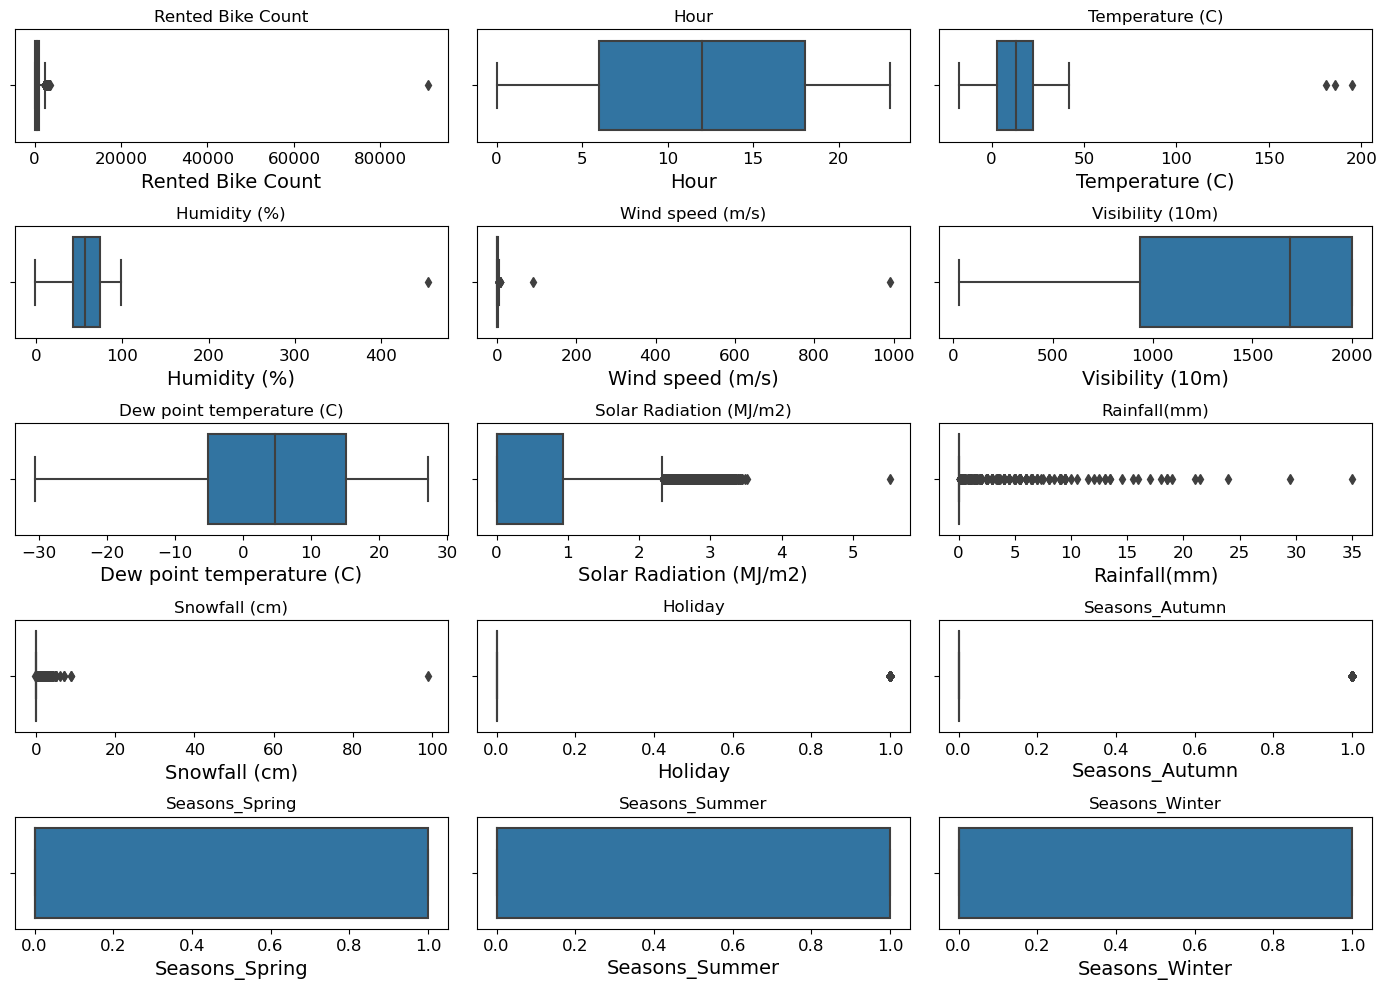

In [17]:
# 5. Identify and fix outliers and errors in the data 
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd  

# Assuming 'cleaned_df' is your DataFrame
col_name = cleaned_df.select_dtypes(exclude="object").columns

plt.figure(figsize=(14, 10))

for i, col in enumerate(col_name[1:], start=1):
    plt.subplot(5, 3, i)  # Adjust subplot grid if needed
    sns.boxplot(x=col, data=cleaned_df)
    plt.title(col)

plt.tight_layout()
plt.show()


We can observe the range, quartiles, and outliers for each characteristic based on the boxplots above. We must exclude the outliers from the following columns in order to guarantee the accuracy of our data: "Rented Bike Count," "Wind speed (m/s)," "Humidity (%)," "Temperature (C)," and "Solar Radiation (MJ/m2)." This process gives us more dependable outcomes.

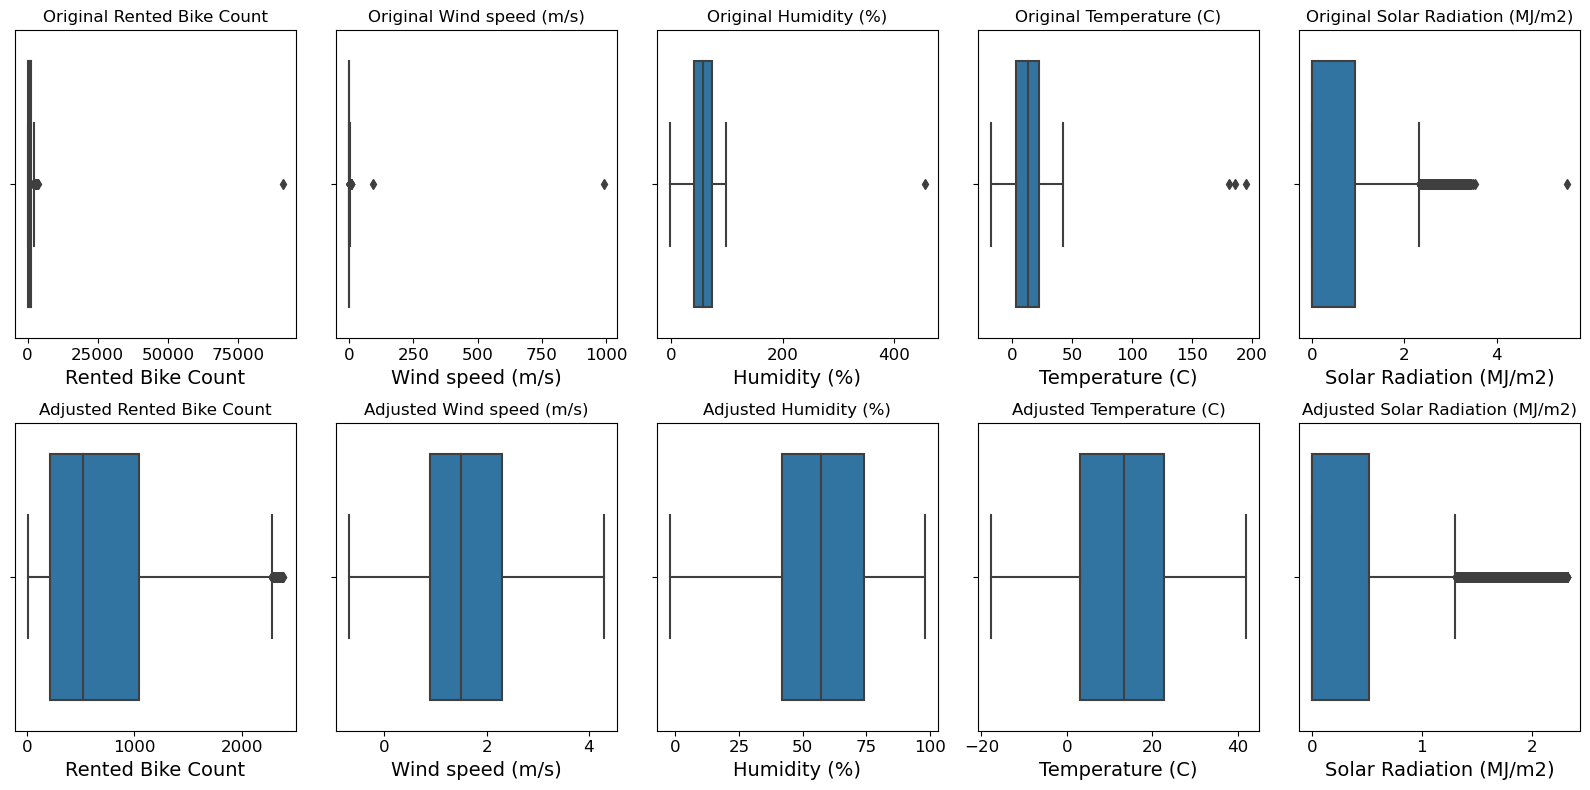

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_df' is your original DataFrame
cleaned_df_no_outlier = cleaned_df.copy()

# Define the specific columns where outliers need to be addressed
specific_columns = ['Rented Bike Count', 'Wind speed (m/s)', 'Humidity (%)', 'Temperature (C)', 'Solar Radiation (MJ/m2)']

# Only remove outliers from the designated columns.
for column in specific_columns:
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # To prevent dropping too much data, only apply the filter to that particular column.
    cleaned_df_no_outlier[column] = cleaned_df_no_outlier[column].where(
        (cleaned_df_no_outlier[column] >= lower_bound) & (cleaned_df_no_outlier[column] <= upper_bound))

# For those particular columns only, replace NaN values with each column's median.
for column in specific_columns:
    median = cleaned_df_no_outlier[column].median()
    cleaned_df_no_outlier[column] = cleaned_df_no_outlier[column].fillna(median)

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=len(specific_columns), figsize=(16, 8))
for i, col in enumerate(specific_columns):
    sns.boxplot(x=cleaned_df[col], ax=axes[0, i]).set_title(f'Original {col}')
    sns.boxplot(x=cleaned_df_no_outlier[col], ax=axes[1, i]).set_title(f'Adjusted {col}')
plt.tight_layout()
plt.show()


# Our correlation heatmap makes the relationships between the important variables more evident after correcting for outliers. 


High correlations can be a sign of multicollinearity, which needs to be addressed to 
improve the accuracy of our model. Less redundancy is present when correlations are weaker, 
indicating that factors contribute separately. These realizations will direct the features we 
choose for the next regression analysis, 
enabling us to create a simple and efficient model.


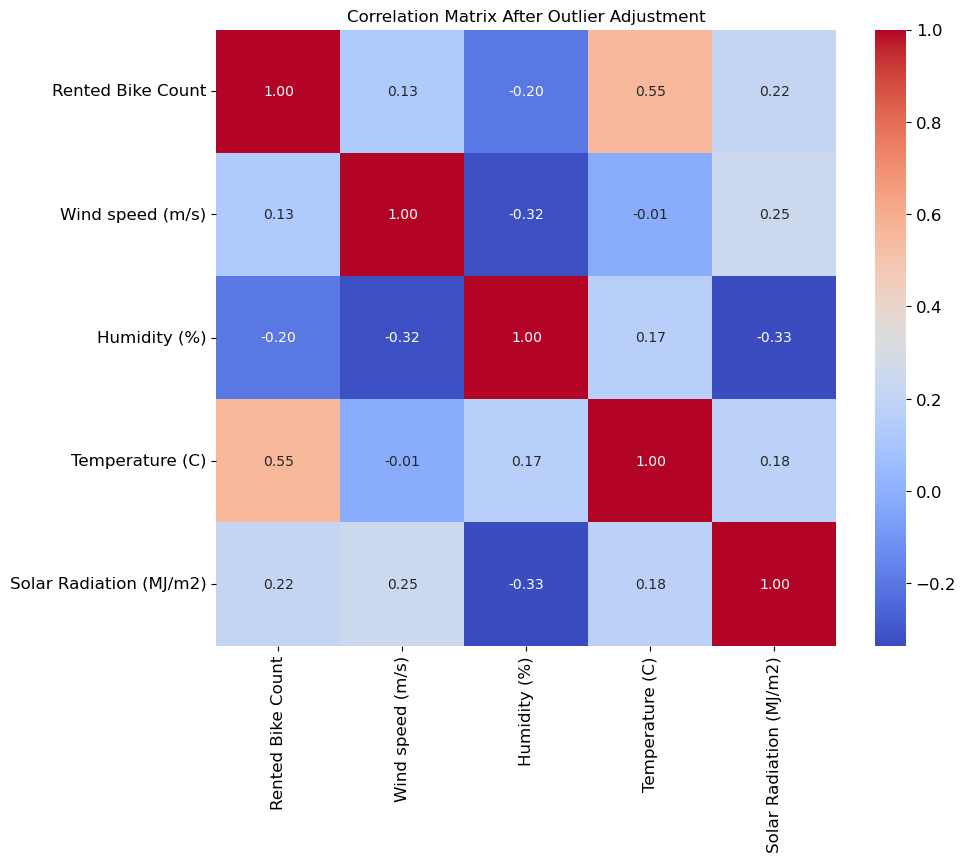

In [19]:
# Assuming 'cleaned_df_no_outlier' is now free of outliers
# Calculate correlation matrix
correlation_matrix = cleaned_df_no_outlier[specific_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After Outlier Adjustment')
plt.show()


The heatmap shows how the weather affects rental bike sales. There is a significant moderate 
positive correlation (0.55) between temperature and bike rentals, indicating that higher 
temperatures are likely to encourage more people to ride bikes. However, humidity shows a 
slightly negative relationship, meaning that people could decide not to ride their 
bikes on days with higher levels of humidity. 
Furthermore, there is a positive association between solar radiation and wind speed, 
indicating that these two factors commonly occur together and somewhat raise the rental of bicycles. 
Understanding these relationships is crucial for constructing predictive models in bike-sharing systems, 
as it makes it easier to select important predictors, such temperature, and adjust correlations 
between them to improve model accuracy and operational strategies.

In [44]:
#Step 6: Save the cleaned data to a specific directory
import pandas as pd

# Save the DataFrame to CSV
cleaned_df.to_csv('/Users/harish/Desktop/umlt/CleanedSeoulBikeData.csv', index=False)

# Load and display the CSV to verify
print(pd.read_csv('/Users/harish/Desktop/umlt/CleanedSeoulBikeData.csv').head())


   Date  Rented Bike Count  Hour  Temperature (C)  Humidity (%)  \
0     1                254     0             -5.2          37.0   
1     1                204     1             -5.5          38.0   
2     1                173     2             -6.0          39.0   
3     1                107     3             -6.2          40.0   
4     1                 78     4             -6.0          36.0   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            

## Step 2: Pre-process the data and perform the first fit (20%)

 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [34]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'cleaned_df' is already loaded with the DataFrame

# Define the preprocessing numerical columns.
numerical_cols = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)',
                  'Dew point temperature (C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Describe the categorical columns that require preparation.
categorical_cols = ['Holiday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']

# Build a pipeline to preprocess numerical data.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Use the median of each column to compute NaNs.
    ('scaler', StandardScaler())  # Set data to be standardized with a unit variance and zero mean.
])

# Build a pipeline to preprocess categorical data.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Output dense matrix
])

# Use ColumnTransformer to apply the changes to the designated columns.
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define the pipeline using linear regression and a preprocessor
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])




In [35]:
# Fit and transform the DataFrame
processed_data = preprocessor.fit_transform(cleaned_df)

# For categorical data, obtain new column names; make sure to use the proper OneHotEncoder access.
cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_columns = numerical_cols + list(cat_features)

# Restore a DataFrame to the processed data.
processed_df = pd.DataFrame(processed_data, columns=all_columns)

# Display the DataFrame info to verify changes
print(processed_df.head())
print(processed_df.info())

   Temperature (C)  Humidity (%)  Wind speed (m/s)  Visibility (10m)  \
0        -1.437753     -1.011869          0.031876          0.929577   
1        -1.461667     -0.964117         -0.097193          0.929577   
2        -1.501525     -0.916366         -0.078755          0.929577   
3        -1.517468     -0.868615         -0.087974          0.929577   
4        -1.501525     -1.059620          0.041095          0.929577   

   Dew point temperature (C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                  -1.627067                -0.653474     -0.132495   
1                  -1.627067                -0.653474     -0.132495   
2                  -1.634619                -0.653474     -0.132495   
3                  -1.627067                -0.653474     -0.132495   
4                  -1.702586                -0.653474     -0.132495   

   Snowfall (cm)  Holiday_0  Holiday_1  Seasons_Autumn_0  Seasons_Autumn_1  \
0      -0.076758        1.0        0.0               1.0      

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [23]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Update feature lists
numerical_features = [
    'Hour',  # Assuming 'Hour' can be treated as numerical
    'Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)',
    'Dew point temperature (C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
]
categorical_features = ['Holiday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']

# Extracting features and target
X = cleaned_df_no_outlier[numerical_features + categorical_features]
y = cleaned_df_no_outlier['Rented Bike Count']

# Split the data into training and test sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Creating the pipeline including a linear regression model
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model on the training data
pipe.fit(X_train, y_train)
pred_test = pipe.predict(X_test) 

# Predict on the training data
y_train_pred = pipe.predict(X_train)

# Calculate RMSE for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE on training data: {rmse_train}')

# Baseline RMSE using the mean of the training targets
mean_train_target = np.mean(y_train)
baseline_predictions = np.full_like(y_train, mean_train_target)  # Creating a full array with the mean value
baseline_rmse = np.sqrt(mean_squared_error(y_train, baseline_predictions))
print(f'Baseline RMSE (mean of training targets): {baseline_rmse}')


RMSE on training data: 407.15399142329767
Baseline RMSE (mean of training targets): 584.7355528704625


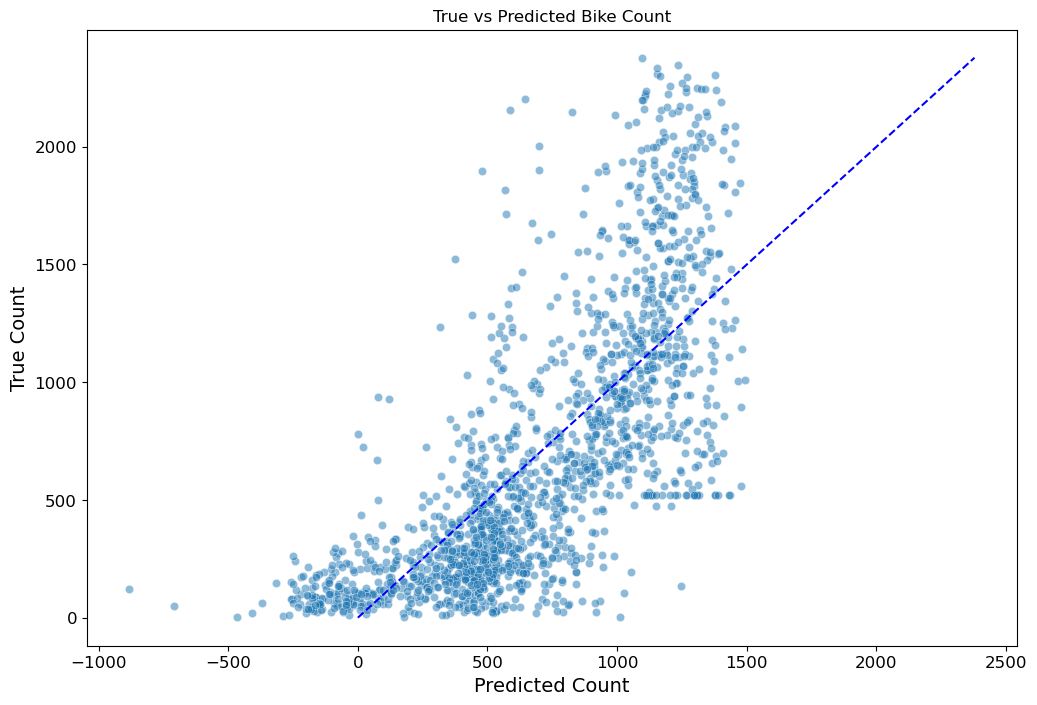

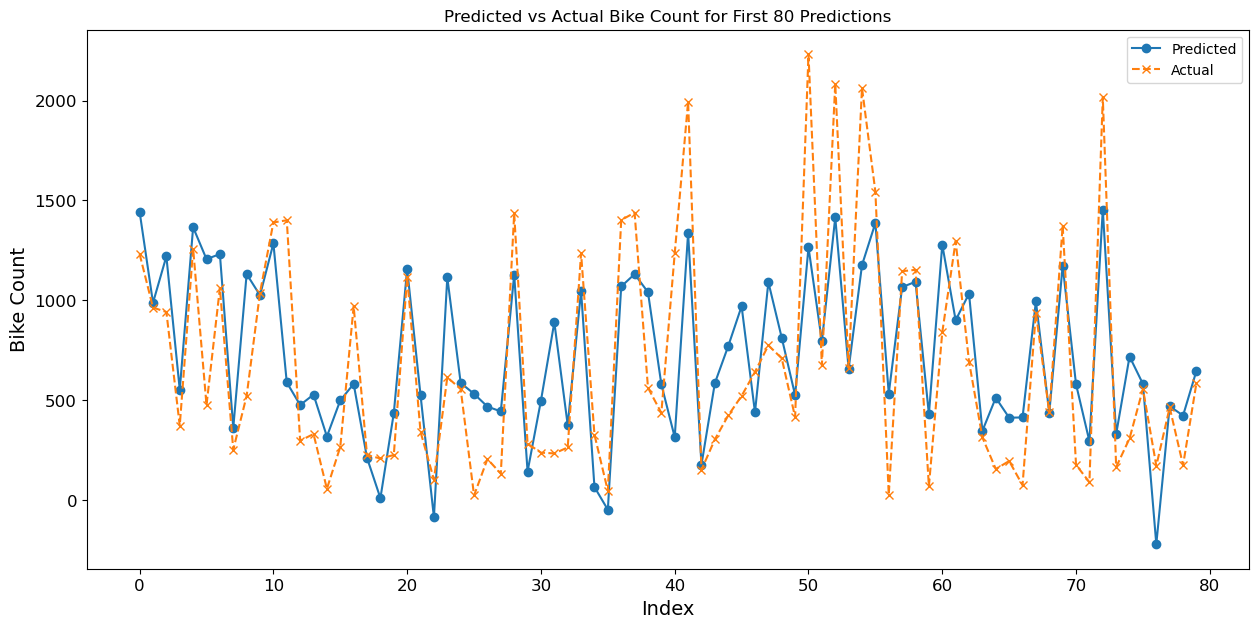

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd  

# Ensure 'pred_test' is defined, e.g., pred_test = model.predict(X_test)

# Dataframe for visualization: Compare actual 'Rented Bike Count' with 'Predicted Count'
graph = pd.DataFrame({
    'Rented Bike Count': y_test.reset_index(drop=True),  # Reset index for proper alignment
    'Predicted Count': pred_test
})

# Scatter plot of true vs predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(data=graph, x='Predicted Count', y='Rented Bike Count', alpha=0.5)
max_value = max(graph['Predicted Count'].max(), graph['Rented Bike Count'].max())
sns.lineplot(x=[0, max_value], y=[0, max_value], color='blue', linestyle='--')  # Line showing y=x for perfect predictions
plt.ylabel('True Count')
plt.xlabel('Predicted Count')
plt.title('True vs Predicted Bike Count')
plt.show()

# Plot of the first 80 predictions vs actual values to visualize prediction accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(80), pred_test[:80], label='Predicted', marker='o', linestyle='-')  # Ensure pred_test has at least 80 elements
plt.plot(range(80), y_test.reset_index(drop=True)[:80], label='Actual', marker='x', linestyle='--')  # Ensure y_test is appropriately aligned
plt.legend()
plt.xlabel('Index')
plt.ylabel('Bike Count')
plt.title('Predicted vs Actual Bike Count for First 80 Predictions')
plt.show()



The graph shows a promising match between estimated and observed bike counts; 
in particular, it does a good job of reflecting the trend over different intervals.

In [37]:
### find root mean squared error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) using pred_test, which is the correct variable name
mse = mean_squared_error(y_test, pred_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE value
print('Root Mean Squared Error (RMSE):', rmse)



Root Mean Squared Error (RMSE): 390.8681733275803


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [38]:
### Your ChatGPT prompt
#Fit a linear regression and a Support Vector Regression method to the data using 10-fold cross-validation for each model.
#Display the mean and standard deviation of the RMSE values for each model (at baseline) in the appropriate datasets.
#Perform a hyper-parameter optimisation on each model using GridSearch.
#Display the mean and standard deviation of the RMSE values for each model (after optimisation) in the appropriate datasets.
#Choose the best model and visualise the results with a single graphic of your choice.

In [39]:
# 1.Fit a linear regression and a Support Vector Regression method to the data using 10-fold cross 
# validation for each model
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.compose import ColumnTransformer

# Assume X and y are already defined and contain your data
# The Root Mean Squared Error (RMSE), which measures the average magnitude of 
# prediction mistakes and penalizes greater errors, is computed by the rmse function. 
# RMSE is a crucial metric for assessing regression models. This aids in evaluating 
# how well the model's predictions match the actual data. In order to guarantee 
# accurate RMSE computation during cross-validation and model evaluation, the 
# make_scorer function thereafter generates a custom scoring object. By 
# indicating that a lower RMSE is preferable, the greater_is_better=False setting 
# directs hyperparameter optimization to reduce prediction errors and improve model accuracy.
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Preprocessing pipelines for all data
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Baseline Models Setup with preprocessing pipelines
linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

svr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

# Evaluate baseline models using 10-fold cross-validation
linear_cv_scores = cross_val_score(linear_model, X, y, cv=kf, scoring=rmse_scorer)
svr_cv_scores = cross_val_score(svr_model, X, y, cv=kf, scoring=rmse_scorer)

print("Linear Regression CV RMSE Scores:", -linear_cv_scores.mean())
print("SVR CV RMSE Scores:", -svr_cv_scores.mean())


Linear Regression CV RMSE Scores: 404.593283929129
SVR CV RMSE Scores: 469.54152715928257


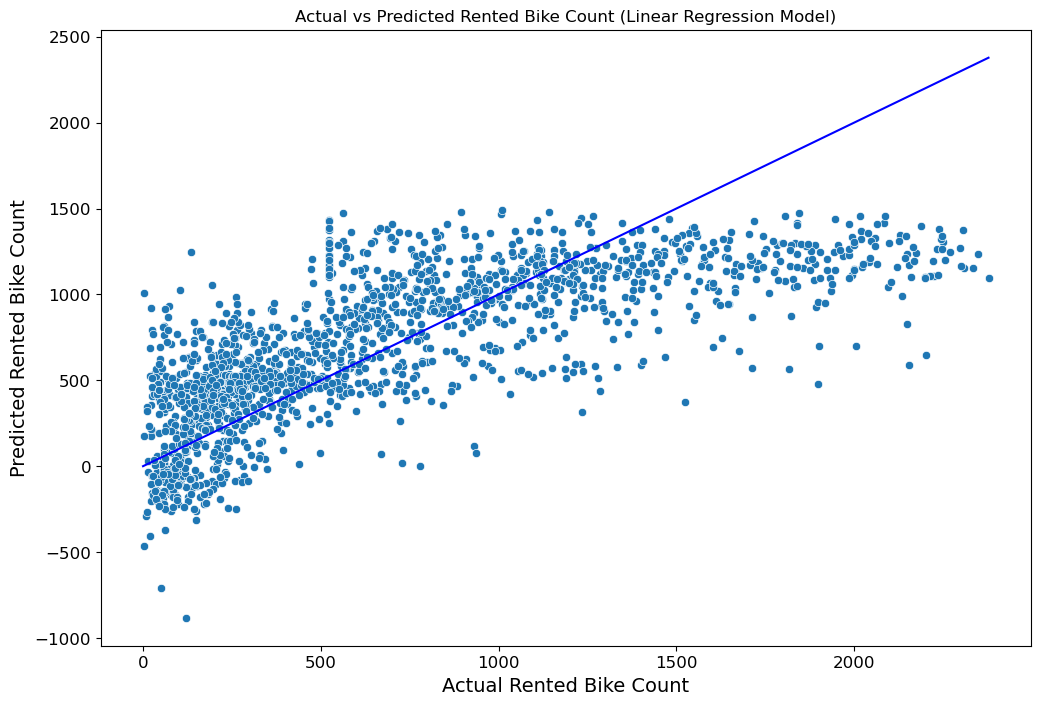

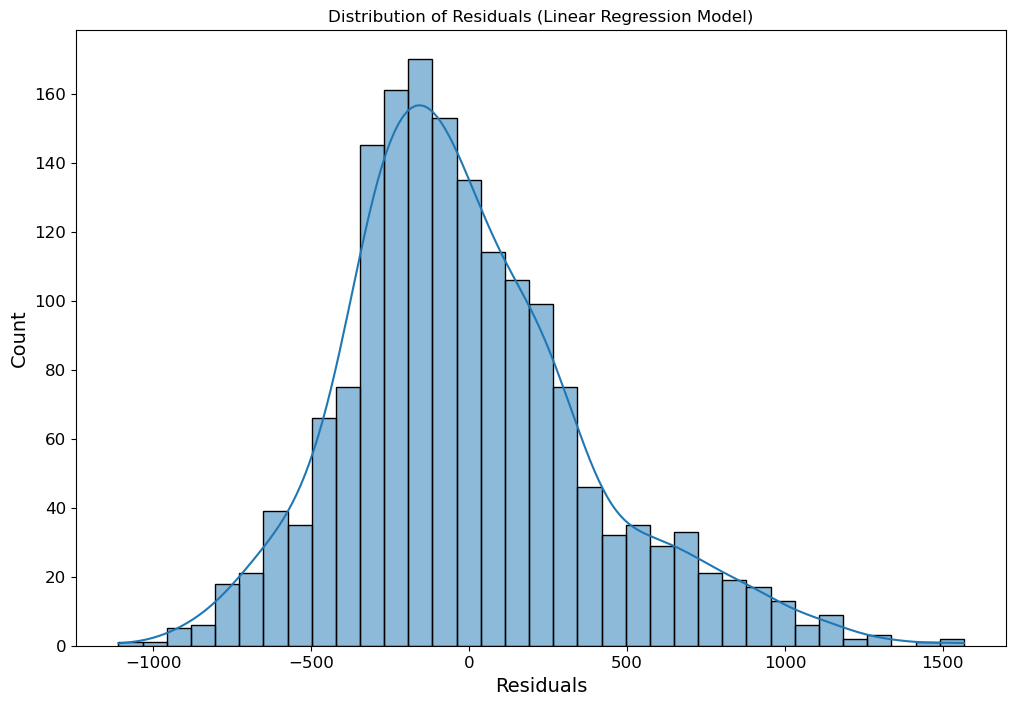

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Considering that 'y_test' represents your real test target values and 'pipe' represents your 
# trained linear regression pipeline

# Make predictions on the test data using the best model (Linear Regression)
y_pred = pipe.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[0, y_test.max()], y=[0, y_test.max()], color='blue', linestyle='-')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count (Linear Regression Model)')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (Linear Regression Model)')
plt.show()


In [40]:
# 2. Display the mean and standard deviation of the RMSE values for each model (at baseline) in the 
# appropriate datasets
# Calculate mean and standard deviation of RMSE for Linear Regression
# Assuming linear_cv_scores and svr_cv_scores contain negative RMSE values from cross_val_score
# Display results for Linear Regression
print("Linear Regression - Baseline CV RMSE:")
print("Mean RMSE:", -linear_cv_scores.mean())
print("Standard Deviation of RMSE:", linear_cv_scores.std())

# Display results for SVR
print("\nSVR - Baseline CV RMSE:")
print("Mean RMSE:", -svr_cv_scores.mean())
print("Standard Deviation of RMSE:", svr_cv_scores.std())

Linear Regression - Baseline CV RMSE:
Mean RMSE: 404.593283929129
Standard Deviation of RMSE: 12.176310729455743

SVR - Baseline CV RMSE:
Mean RMSE: 469.54152715928257
Standard Deviation of RMSE: 13.895699978917188


In [41]:
#3. Perform a hyper-parameter optimisation on each model using GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# This pipeline can be used for both Linear Regression and SVR
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputes missing values with the median of each column
    ('scaler', StandardScaler())                    # Standardizes the data
])

# Define the full pipeline for Linear Regression
linear_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('linear', LinearRegression())
])

# Hyper-parameter grid for Linear Regression
linear_param_grid = {
    'linear__fit_intercept': [True, False],
    'linear__positive': [True, False]
}

# Define the full pipeline for SVR
svr_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('svr', SVR())
])

# Hyper-parameter grid for SVR
svr_param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

# Assuming your data has been defined and prepared for X_train and Y_train.
# Perform GridSearchCV for Linear Regression
linear_grid_search = GridSearchCV(linear_pipeline, linear_param_grid, cv=10, scoring=rmse_scorer)
linear_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for SVR
svr_grid_search = GridSearchCV(svr_pipeline, svr_param_grid, cv=10, scoring=rmse_scorer)
svr_grid_search.fit(X_train, y_train)

# Display the best parameters and best RMSE for both models
print("Linear Regression - Best RMSE:", -linear_grid_search.best_score_, "Best Params:", linear_grid_search.best_params_)
print("SVR - Best RMSE:", -svr_grid_search.best_score_, "Best Params:", svr_grid_search.best_params_)

Linear Regression - Best RMSE: 408.31721601602254 Best Params: {'linear__fit_intercept': True, 'linear__positive': False}
SVR - Best RMSE: 387.26433620544304 Best Params: {'svr__C': 10, 'svr__epsilon': 0.5, 'svr__gamma': 'scale'}


In [42]:
# 4. Display the mean and standard deviation of the RMSE values for each model (after optimisation) 
# in the appropriate datasets

# best parameters and scores 
linear_best_rmse = linear_grid_search.best_score_
linear_best_params = linear_grid_search.best_params_

svr_best_rmse = svr_grid_search.best_score_
svr_best_params = svr_grid_search.best_params_

print(f" Linear Regression - Best RMSE: {-linear_best_rmse} , Best Params: {linear_best_params}")
print(f" SVR - Best RMSE: {-svr_best_rmse} , Best Params: {svr_best_params}")

 Linear Regression - Best RMSE: 408.31721601602254 , Best Params: {'linear__fit_intercept': True, 'linear__positive': False}
 SVR - Best RMSE: 387.26433620544304 , Best Params: {'svr__C': 10, 'svr__epsilon': 0.5, 'svr__gamma': 'scale'}


SVR achieves a lower RMSE of 387.264, outperforming Linear Regression in capturing complicated data patterns. This model is the best option for predicting bike rentals because of its ideal tuning, which guarantees accurate and trustworthy forecasts. We are able to offer forecasts that are more trustworthy and accurate by utilizing SVR.


Best Model: Support Vector Regression (SVR)
SVR - Best RMSE from GridSearchCV: 387.26
SVR RMSE on test data: 362.59


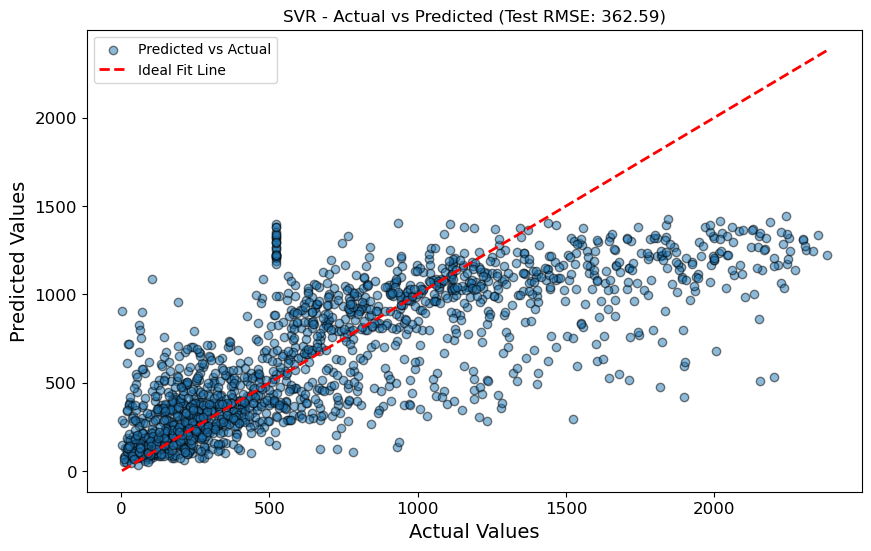

In [43]:
# 5. Choose the best model and visualise the results with a single graphic of your choice
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Presuming that your entire dataset and goals are 'X' and 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best RMSE value from GridSearchCV for SVR
best_svr_rmse = -svr_grid_search.best_score_  # Negate because GridSearchCV returns negative RMSE

# Using training data, fit the optimal SVR model.
svr_model = svr_grid_search.best_estimator_
svr_model.fit(X_train, y_train)

# On the test data, make predictions using the SVR model.
y_pred = svr_model.predict(X_test)

# Calculate RMSE on the test set
test_rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the best model and its RMSE values
print(f"Best Model: Support Vector Regression (SVR)")
print(f"SVR - Best RMSE from GridSearchCV: {best_svr_rmse:.2f}")
print(f"SVR RMSE on test data: {test_rmse_value:.2f}")

# Plot the outcomes with a line of perfect fit on a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'SVR - Actual vs Predicted (Test RMSE: {test_rmse_value:.2f})')
plt.legend()
plt.show()


## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

# Your answer here (maximum of 200 words)


In order to strengthen our machine learning pipelines and lay the groundwork for further improvements, I offer a solution as a data scientist. Categorical variables are scaled incorrectly by our present preprocessing technique, which uses the same transformation steps for both numerical and categorical data. Model predictions are skewed and their attributes are affected.

In order to address this, we should handle categorical and numeric data independently using ColumnTransformer, making sure that each feature is handled correctly. We may incorporate sophisticated feature engineering and selection methods into our pipelines for upcoming advancements, such as genetic algorithms or AutoML. By identifying and optimizing feature combinations, these techniques will assist reveal hidden interactions within the data.

Furthermore, by utilizing interpretability techniques such as SHAP or LIME, we will be able to comprehend and elucidate the ways in which specific variables contribute to predictions, hence enhancing the confidence that users have in our models—particularly in crucial areas.

Long-term goal is to develop an adaptive learning framework that is capable of continuously improving models in response to fresh information and changing needs. This approach guarantees that we can provide dependable, comprehensible, and significant insights, resulting in more intelligent company choices and innovations.